# MIST101 Pratical 2: Introduction to Tensorflow (MNIST)

Welcome to the first tutorial of MIST101. The goal of this tutorial is to show how to use Tensorflow to train and evaluate a simple neural network for handwritten digit classification using the MNIST data set.

## Visualize the Data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data # For tutorial purpose, we directly get the data set from tensorflow
from tensorflow.examples.tutorials.mnist import mnist   
%matplotlib inline

Download the data and save them into a folder

In [5]:
data_sets = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


To visualize what the data look like, we can randomly pick an image input and label from the data set.

In [6]:
# Random pick a image-label pair from the dataset
random_index = np.random.randint(len(data_sets.train.images))
image_example = data_sets.train.images[random_index]
label_example = data_sets.train.labels[random_index]

We can see the image input is a vector (size: 768 = 28 * 28), representing the grey scale of each pixel of the image. The label is another vector (size: 10), indicating which number the image corresponds to. 

In [7]:
# Image is stored as an array like object
image_example

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [10]:
# Label is represented in one-hot
label_example

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

To better visualize the data, we show a graphics of the image.

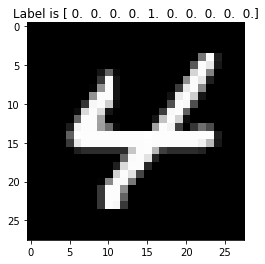

In [11]:
# Reshape the image array into a pixel matrix
image_example_pixels = image_example.reshape((28, 28))

# Show the image
plt.title('Label is {label}'.format(label = label_example))
plt.imshow(image_example_pixels, cmap='gray')
plt.show()

## Create a model

Now, we are going to create a linear model that predicts from image to the number categories. The model needs the image input to predict its category. During trianing, the model also needs the correct label of the image input to it. Therefore, we create two placeholders for the model.

Notice that we have to specify the shape and the data type of the tensor. For this tutorial, we use stochastic gradient descent. It means that for each training iteration, we want a small batch of data from the data set (a batch of image-label pairs).

In [12]:
batch_size = 100
image_size = 28 * 28
category_size = 10

# Create a placeholder that has the type of float32 and shape of (batch_size, image_size)
images_placeholder = tf.placeholder(tf.float32, shape = (batch_size, image_size))
label_placeholder = tf.placeholder(tf.int32, shape = (batch_size, category_size))

A simple linear model can be represented as $y = Wx + b$ where $x$, $y$ are the input vector and output vector of the model respectively. The trainable parameters include $W$ (the weight matrix) and $b$ (the bias vector).

In [13]:
weights = tf.Variable(tf.zeros(shape = [image_size, category_size])) # The weight matrix
biases = tf.Variable(tf.zeros(shape = [category_size]))              # The bias vector
output = tf.matmul(images_placeholder, weights) + biases             # The output of the model
predict = tf.nn.softmax(output)                                      # Transform the output into a proability distribution over 10 categories

## Train the Model
After finishing building the model, we can start to train our model. Recall that the learning target for a classification problem is usually the cross entropy between the predicted distribution and true distribution. 

In [14]:
# Define the learning target as the cross entropy of the predictions and the labels
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = output, labels = label_placeholder))

# Define a training step to minimize the cross entropy with gradient descent algorithm
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

To run any op in Tensorflow, we need to first create a session and initialize all the variables defined. 

In [15]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

Now, we can start training. For each training iteration, we give the model a mini batch of images and labels and perform a training step (performing gradient descent to minimize the cross entropy).

In [16]:
for step in range(1000):
    batch_images, batch_labels = data_sets.train.next_batch(batch_size)   # Get a mini batch of images and labels
    sess.run(train_step, feed_dict = {images_placeholder : batch_images,  # Perform a training step
                                      label_placeholder : batch_labels})

## Evaluate the Model
After 1000 iterations, the model should be well-trained now. We can evaluate our model using the pairs of images and labels from the test set.

In [17]:
# Create ops for prediction accuracy
correct_prediction = tf.equal(tf.argmax(label_placeholder, 1), tf.argmax(predict, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
# Retreive test data
test_images = data_sets.test.images[:batch_size]
test_labels = data_sets.test.labels[:batch_size]

# Evaluate the model
print("Prediction Accuracy: " + str(sess.run(accuracy, feed_dict = {images_placeholder : test_images,
                                      label_placeholder : test_labels})))

Prediction Accuracy: 0.96


## Advance Usage
In this section, we demonstrate a more flexible and complex model to improve the prediction accuracy

In [19]:
batch_size = 100
image_size = 28 * 28
category_size = 10
images_placeholder = tf.placeholder(tf.float32, shape = (None, image_size))   # We can put "None" to make the size of the tensor flexible (batch size is variable)
label_placeholder = tf.placeholder(tf.int32, shape = (None, category_size)) 

hidden_units = 128
weights1 = tf.Variable(tf.truncated_normal(shape = [image_size, hidden_units], stddev = 0.1))    # The weight matrix from image input to the first hidden layer
weights2 = tf.Variable(tf.truncated_normal(shape = [hidden_units, hidden_units], stddev = 0.1))  # The weight matrix from first to second hidden layer
weights3 = tf.Variable(tf.truncated_normal(shape = [hidden_units, category_size], stddev = 0.1)) # The weight matrix from second hidden layer to the output

biases1 = tf.Variable(tf.zeros(shape = [hidden_units]))              # The bias vectors
biases2 = tf.Variable(tf.zeros(shape = [hidden_units]))              
biases3 = tf.Variable(tf.zeros(shape = [category_size]))              

hidden1 = tf.nn.relu(tf.matmul(images_placeholder, weights1) + biases1)
hidden2 = tf.nn.relu(tf.matmul(hidden1, weights2) + biases2)
output = tf.matmul(hidden2, weights3) + biases3            # The output of the model
predict = tf.nn.softmax(output)     

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = output, labels = label_placeholder))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for step in range(2000):
    batch_images, batch_labels = data_sets.train.next_batch(batch_size)                                    # Get a mini batch of images and labels
    _, loss_value = sess.run([train_step, cross_entropy], feed_dict = {images_placeholder : batch_images,  # Perform a training step
                                                                       label_placeholder : batch_labels})
    
    # Display
    if step % 100 == 0:
        print('Step %d: loss = %.2f' % (step, loss_value))

correct_prediction = tf.equal(tf.argmax(label_placeholder, 1), tf.argmax(predict, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Evaluate the model
print("Prediction Accuracy: " + str(sess.run(accuracy, feed_dict = {images_placeholder : data_sets.test.images,
                                                                    label_placeholder : data_sets.test.labels})))

Step 0: loss = 2.33
Step 100: loss = 0.34
Step 200: loss = 0.12
Step 300: loss = 0.30
Step 400: loss = 0.12
Step 500: loss = 0.18
Step 600: loss = 0.28
Step 700: loss = 0.11
Step 800: loss = 0.13
Step 900: loss = 0.13
Step 1000: loss = 0.08
Step 1100: loss = 0.15
Step 1200: loss = 0.08
Step 1300: loss = 0.04
Step 1400: loss = 0.04
Step 1500: loss = 0.13
Step 1600: loss = 0.05
Step 1700: loss = 0.13
Step 1800: loss = 0.01
Step 1900: loss = 0.06
Prediction Accuracy: 0.9691


*This tutorial is modified from https://www.tensorflow.org/get_started/*